# Geospatial Data Analysis

Installation guide for the library used in this notebook [Link](https://scikit-gstat.readthedocs.io/en/latest/install.html)<br>
<br>
<b>`Scikit-learn` is a library for Python programming language which has a lot of applications in Machine learning and statistical modelling</b><br>
Learn more about scikit-learn library using [Link](https://scikit-learn.org/stable/)<br>
<br><b>The main application for `Scikit-gstat` library is Variogram analysis and Kriging</b><br>
Learn more about scikit-gstat library [Link](https://scikit-learn.org/stable/)<br>
The variogram relates pair-wise separating distances of coordinates and relates them to the semi-variance of the corresponding values pairs.<br>

<b>Scipy</b> : `SciPy` is a free and open-source Python library used for scientific computing and technical computing. SciPy contains modules for optimization, linear algebra, integration, interpolation, special functions, FFT, signal and image processing, ODE solvers and other tasks common in science and engineering. Refer [Link](https://scipy.org/)

In [1]:
# !pip install seaborn
# !pip install scikit-learn
# !pip install scikit-gstat
# !pip install scipy

# !pip install matplotlib
# !pip install numpy
# !pip install pandas

In [2]:
# Importing libraries
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Reading the csv file
df = pd.read_csv('Havelock_part1_dat_UTM.csv')
df

,UTM Northing,UTM Easting,Elevation,smp_id,Lab No,Date Recd,Date Rept,B Depth,E Depth,1:1 Soil pH,...,CEC/Sum of Cations me/100g,%H Sat,%K Sat,%Ca Sat,%Mg Sat,%Na Sat,Mehlich P-III ppm P,Total N ppm,Soil Moisture %,Total Carbon %
0,4525992.880,701021.0552,354.5741,C1,515096,10/26/2018,10/31/2018,0,8,5.9,...,30.2,17,8,63,11,0,28,1967,23.6,2.262
1,4525995.129,701060.8621,353.7372,C2,515097,10/26/2018,10/31/2018,0,8,5.9,...,30.4,17,9,64,10,0,31,1977,19.6,2.271
2,4525995.986,701100.0932,353.0606,C3,515098,10/26/2018,10/31/2018,0,8,5.8,...,29.9,16,8,65,10,0,23,1940,18.0,2.265
3,4525996.753,701138.8967,352.7393,C4,515099,10/26/2018,10/31/2018,0,8,5.4,...,34.4,25,7,59,9,0,33,2114,16.6,2.536
4,4525997.618,701177.4414,352.3948,C5,515100,10/26/2018,10/31/2018,0,8,5.6,...,31.5,21,5,63,11,0,29,1966,17.5,2.325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,4526259.659,701188.7769,353.0396,S59,515234,10/26/2018,10/31/2018,0,8,6.6,...,18.0,0,7,77,15,0,13,2044,17.0,2.332
139,4526258.541,701149.1532,353.1406,S58,515233,10/26/2018,10/31/2018,0,8,5.9,...,21.1,26,5,56,13,0,18,1822,17.9,2.061
140,4526257.780,701111.0196,352.9959,S57,515232,10/26/2018,10/31/2018,0,8,6.3,...,20.4,21,5,62,12,0,13,1899,15.7,2.225
141,4526256.665,701073.0092,352.7590,S56,515231,10/26/2018,10/31/2018,0,8,6.2,...,19.0,22,6,62,10,0,19,1827,17.3,2.109


In [4]:
# We will remove the data we are not using in our code
df = df.drop(['smp_id', 'Lab No', 'Date Recd', 'Date Rept', 'B Depth', 'E Depth', 'WDRF Buffer pH', '1:1 S Salts mmho/cm', 'Excess Lime', 'Texture No', 'lbs N/A', 'Potassium ppm K', 'Magnesium ppm Mg', 'Sodium ppm Na', '%H Sat', '%K Sat', '%Ca Sat', '%Mg Sat', '%Na Sat'], axis = 1)
df

,UTM Northing,UTM Easting,Elevation,1:1 Soil pH,Nitrate-N ppm N,Calcium ppm Ca,CEC/Sum of Cations me/100g,Mehlich P-III ppm P,Total N ppm,Soil Moisture %,Total Carbon %
0,4525992.880,701021.0552,354.5741,5.9,3.0,3836,30.2,28,1967,23.6,2.262
1,4525995.129,701060.8621,353.7372,5.9,8.5,3900,30.4,31,1977,19.6,2.271
2,4525995.986,701100.0932,353.0606,5.8,8.1,3885,29.9,23,1940,18.0,2.265
3,4525996.753,701138.8967,352.7393,5.4,3.3,4035,34.4,33,2114,16.6,2.536
4,4525997.618,701177.4414,352.3948,5.6,7.4,3952,31.5,29,1966,17.5,2.325
...,...,...,...,...,...,...,...,...,...,...,...
138,4526259.659,701188.7769,353.0396,6.6,7.6,2778,18.0,13,2044,17.0,2.332
139,4526258.541,701149.1532,353.1406,5.9,11.2,2404,21.1,18,1822,17.9,2.061
140,4526257.780,701111.0196,352.9959,6.3,7.8,2567,20.4,13,1899,15.7,2.225
141,4526256.665,701073.0092,352.7590,6.2,6.8,2372,19.0,19,1827,17.3,2.109


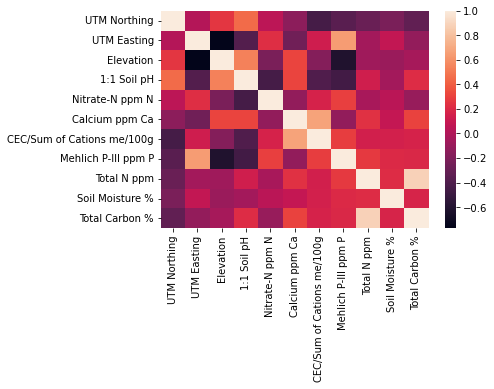

In [5]:
# Building a heatmap based on correlation of columns with each other
ax = sns.heatmap(df.corr())

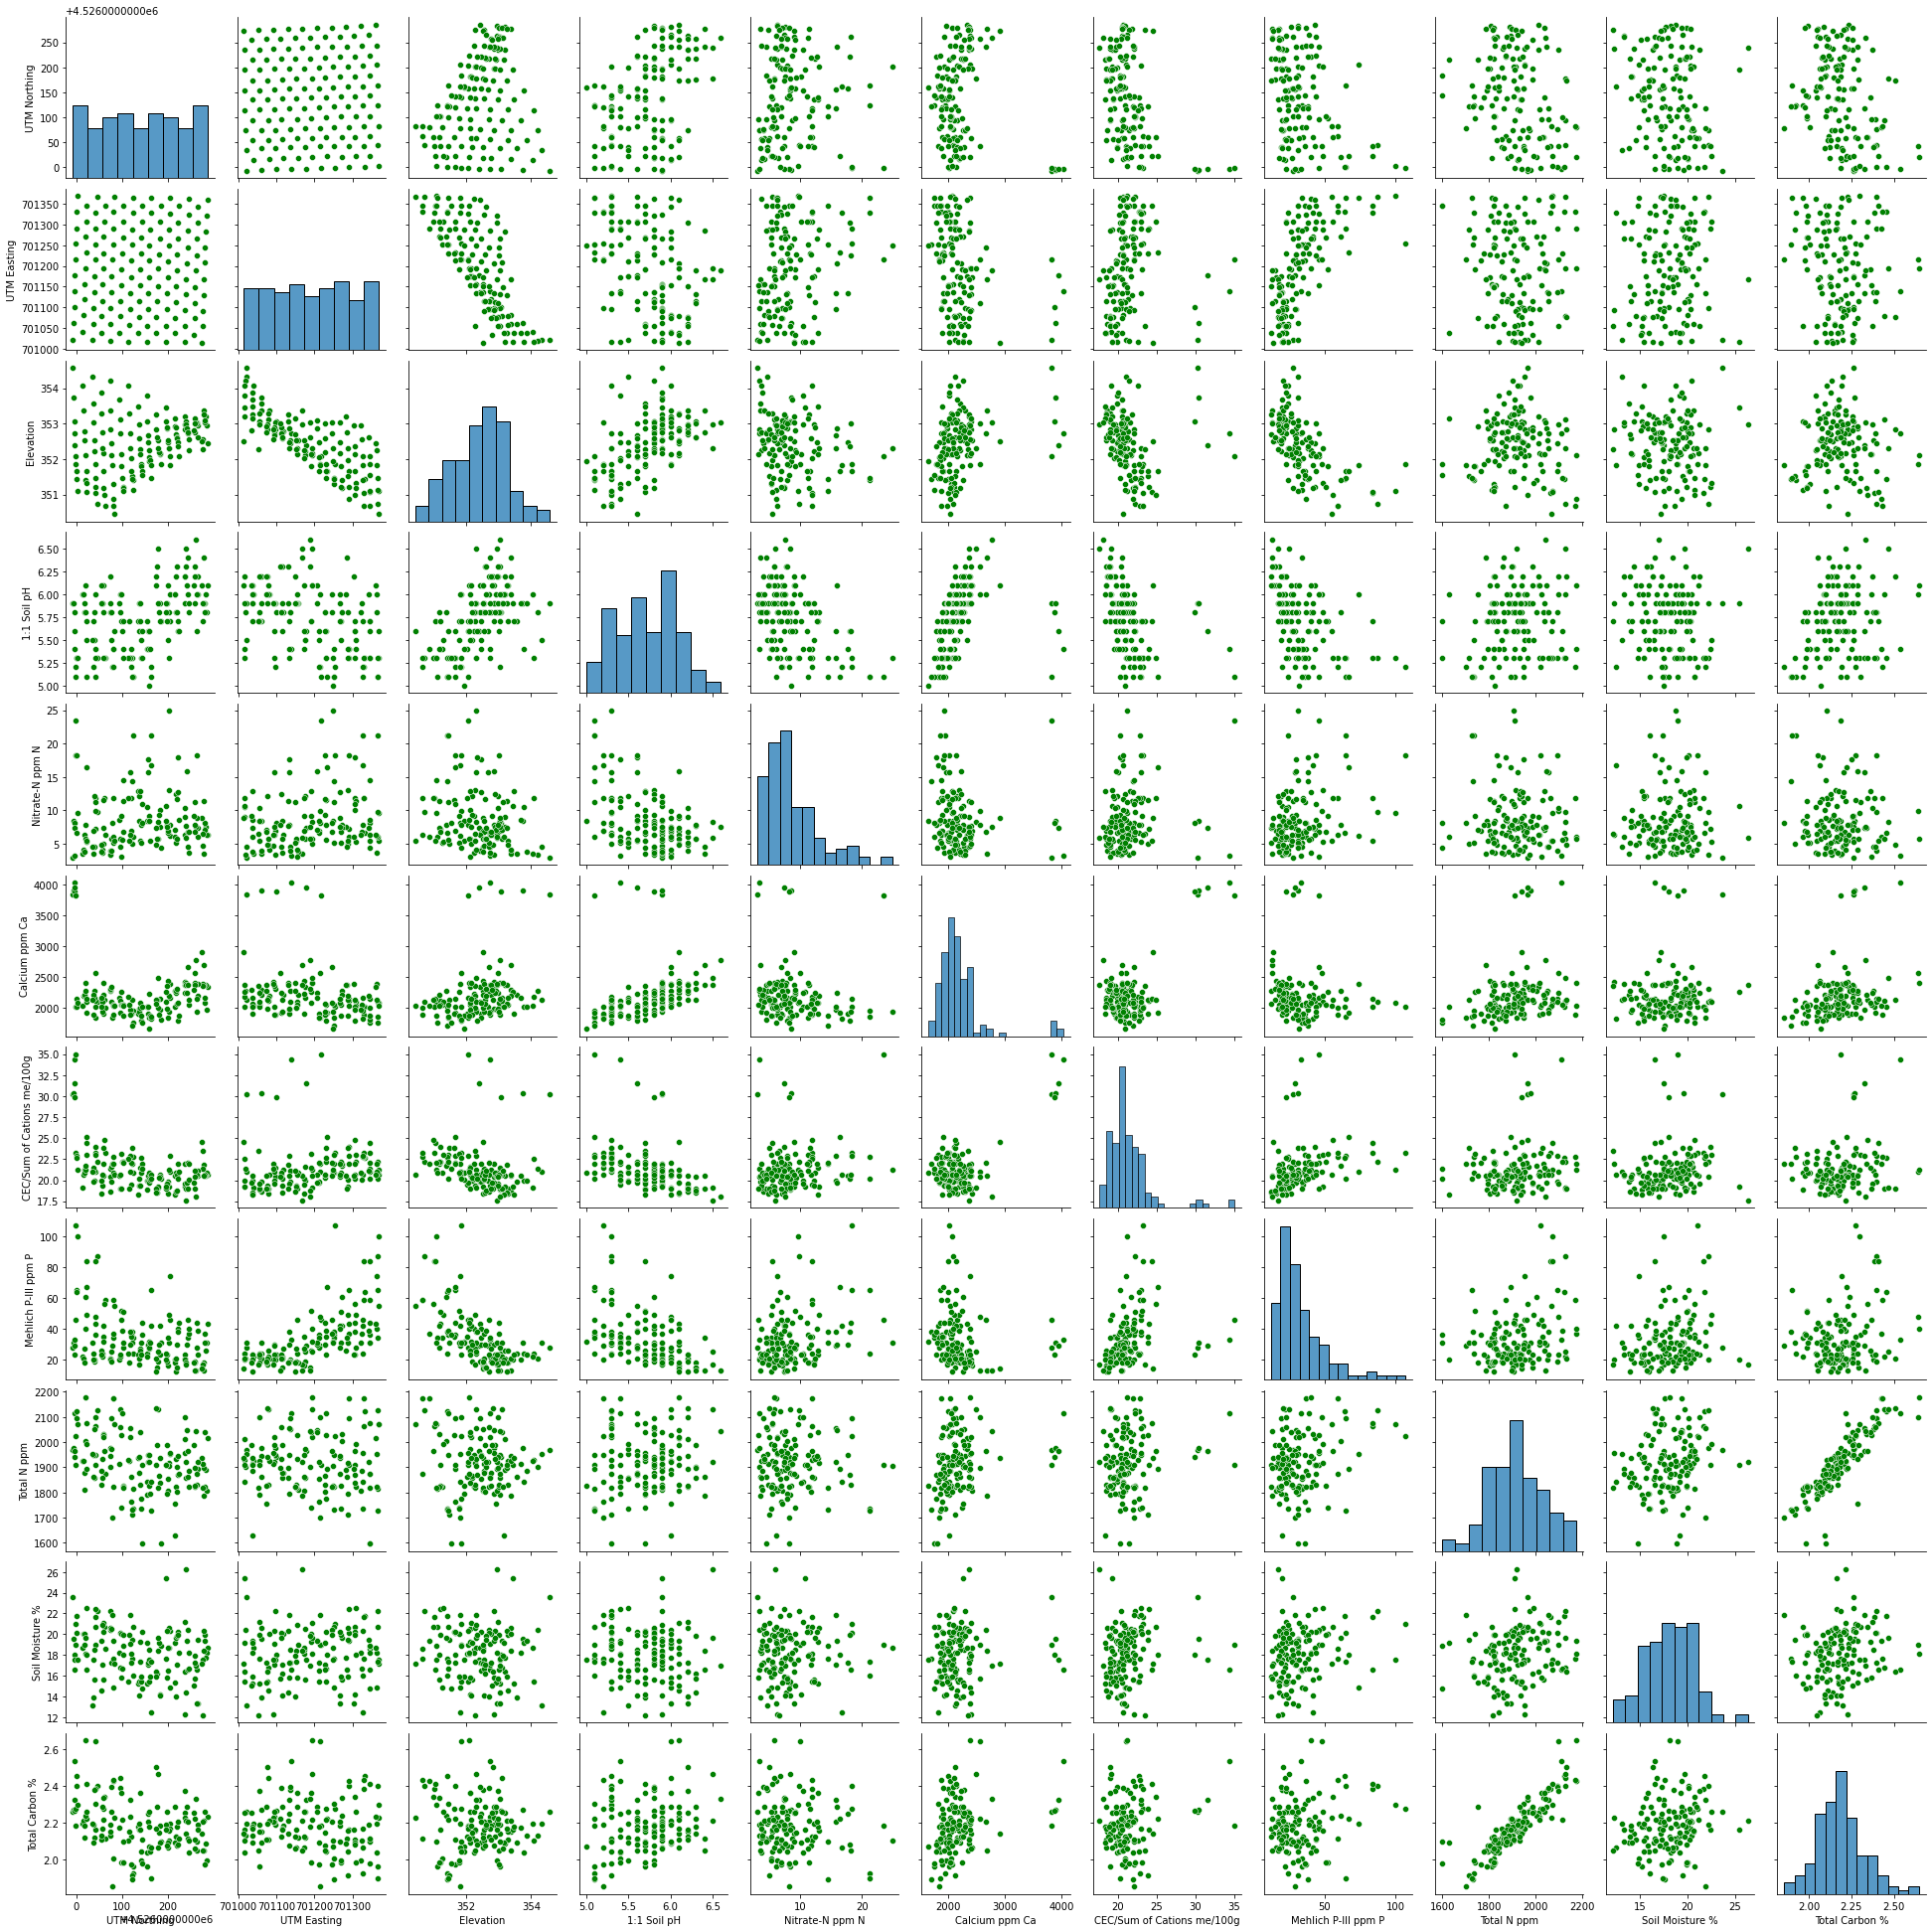

In [6]:
# Line 5 in R-code
ax = sns.pairplot(df, plot_kws={'color':'green'})

In [7]:
df

,UTM Northing,UTM Easting,Elevation,1:1 Soil pH,Nitrate-N ppm N,Calcium ppm Ca,CEC/Sum of Cations me/100g,Mehlich P-III ppm P,Total N ppm,Soil Moisture %,Total Carbon %
0,4525992.880,701021.0552,354.5741,5.9,3.0,3836,30.2,28,1967,23.6,2.262
1,4525995.129,701060.8621,353.7372,5.9,8.5,3900,30.4,31,1977,19.6,2.271
2,4525995.986,701100.0932,353.0606,5.8,8.1,3885,29.9,23,1940,18.0,2.265
3,4525996.753,701138.8967,352.7393,5.4,3.3,4035,34.4,33,2114,16.6,2.536
4,4525997.618,701177.4414,352.3948,5.6,7.4,3952,31.5,29,1966,17.5,2.325
...,...,...,...,...,...,...,...,...,...,...,...
138,4526259.659,701188.7769,353.0396,6.6,7.6,2778,18.0,13,2044,17.0,2.332
139,4526258.541,701149.1532,353.1406,5.9,11.2,2404,21.1,18,1822,17.9,2.061
140,4526257.780,701111.0196,352.9959,6.3,7.8,2567,20.4,13,1899,15.7,2.225
141,4526256.665,701073.0092,352.7590,6.2,6.8,2372,19.0,19,1827,17.3,2.109


In [8]:
# Renaming columns in the datframe for ease
df = df.rename(columns={'UTM Northing':'UTM_N', 'UTM Easting':'UTM_E', 'Elevation':'Ele', '1:1 Soil pH':'ph', 
                        'Nitrate-N ppm N':'No3', 'Calcium ppm Ca':'Ca', 'CEC/Sum of Cations me/100g':'CEC', 
                        'Mehlich P-III ppm P':'P', 'Total N ppm':'TN', 'Soil Moisture %':'MC', 'Total Carbon %':'TC'})
df

,UTM_N,UTM_E,Ele,ph,No3,Ca,CEC,P,TN,MC,TC
0,4525992.880,701021.0552,354.5741,5.9,3.0,3836,30.2,28,1967,23.6,2.262
1,4525995.129,701060.8621,353.7372,5.9,8.5,3900,30.4,31,1977,19.6,2.271
2,4525995.986,701100.0932,353.0606,5.8,8.1,3885,29.9,23,1940,18.0,2.265
3,4525996.753,701138.8967,352.7393,5.4,3.3,4035,34.4,33,2114,16.6,2.536
4,4525997.618,701177.4414,352.3948,5.6,7.4,3952,31.5,29,1966,17.5,2.325
...,...,...,...,...,...,...,...,...,...,...,...
138,4526259.659,701188.7769,353.0396,6.6,7.6,2778,18.0,13,2044,17.0,2.332
139,4526258.541,701149.1532,353.1406,5.9,11.2,2404,21.1,18,1822,17.9,2.061
140,4526257.780,701111.0196,352.9959,6.3,7.8,2567,20.4,13,1899,15.7,2.225
141,4526256.665,701073.0092,352.7590,6.2,6.8,2372,19.0,19,1827,17.3,2.109


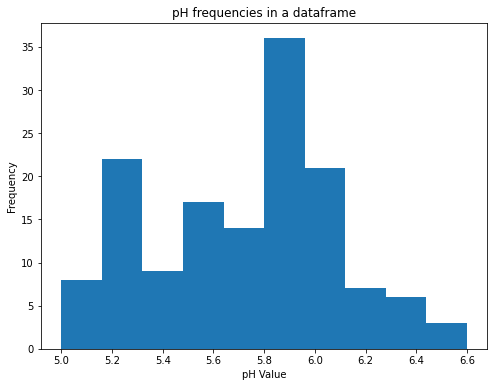

In [9]:
# Plotting frequencies for difference pH values in the dataframe
plt.figure(figsize=(8,6))

# adjust bins documentation
plt.hist(df.ph)

plt.title('pH frequencies in a dataframe')
plt.xlabel('pH Value')
plt.ylabel('Frequency')

plt.show()

In [10]:
# Reading pH values from dataframe into a variable
pH = df.ph

In [11]:
# Finding mean of pH values
mean_pH = np.mean(pH)
mean_pH = round(mean_pH, 3)
mean_pH

5.723

In [12]:
# Finding max value of all values in thepH
max_pH = np.max(pH)
max_pH

6.6

In [13]:
# Finding the min value in pH
min_pH = np.min(pH)
min_pH

5.0

In [14]:
# Finding sd of all values in pH
sd_pH = np.std(pH)
sd_pH = round(sd_pH,3)
sd_pH

0.354

In [15]:
# Finding variance of values in the pH column 
var_pH = np.var(pH) # Variance 
var_pH = round(var_pH,3)
var_pH

0.125

In [16]:
# Finding median value in pH
median = np.median(pH)
median

5.8

In [17]:
df

,UTM_N,UTM_E,Ele,ph,No3,Ca,CEC,P,TN,MC,TC
0,4525992.880,701021.0552,354.5741,5.9,3.0,3836,30.2,28,1967,23.6,2.262
1,4525995.129,701060.8621,353.7372,5.9,8.5,3900,30.4,31,1977,19.6,2.271
2,4525995.986,701100.0932,353.0606,5.8,8.1,3885,29.9,23,1940,18.0,2.265
3,4525996.753,701138.8967,352.7393,5.4,3.3,4035,34.4,33,2114,16.6,2.536
4,4525997.618,701177.4414,352.3948,5.6,7.4,3952,31.5,29,1966,17.5,2.325
...,...,...,...,...,...,...,...,...,...,...,...
138,4526259.659,701188.7769,353.0396,6.6,7.6,2778,18.0,13,2044,17.0,2.332
139,4526258.541,701149.1532,353.1406,5.9,11.2,2404,21.1,18,1822,17.9,2.061
140,4526257.780,701111.0196,352.9959,6.3,7.8,2567,20.4,13,1899,15.7,2.225
141,4526256.665,701073.0092,352.7590,6.2,6.8,2372,19.0,19,1827,17.3,2.109


### What is a Semi-Variogram?
The semivariogram depicts the spatial autocorrelation of the measured sample points.
* Low semi-variance suggests that corresponding pts. have similar values
* High semi-variance suggests that corresponding pts. have different values<br>
* For more information on the topic: [Link](https://pro.arcgis.com/en/pro-app/latest/help/analysis/geostatistical-analyst/understanding-a-semivariogram-the-range-sill-and-nugget.htm#:~:text=The%20semivariogram%20depicts%20the%20spatial,used%20to%20describe%20these%20models.)
* Do watch this video [Link](https://www.youtube.com/watch?v=L-hnxGq74q0)

In [18]:
# Forming another datframe including only 'UTM_N' and 'UTM_E' columns

# Updating the 'UTM_N' values with their round-of values
df['UTM_N'] = round(df.loc[:, ['UTM_N']], 1)
df['UTM_E'] = round(df.loc[:, ['UTM_E']], 1)

# Creating a new dataframe of only the 1st-2 columns
df1 = df.loc[:, ['UTM_N', 'UTM_E']]

# Reading the new datframe - which stores coordinates of locations where sampling was done in the field
df1

,UTM_N,UTM_E
0,4525992.9,701021.1
1,4525995.1,701060.9
2,4525996.0,701100.1
3,4525996.8,701138.9
4,4525997.6,701177.4
...,...,...
138,4526259.7,701188.8
139,4526258.5,701149.2
140,4526257.8,701111.0
141,4526256.7,701073.0


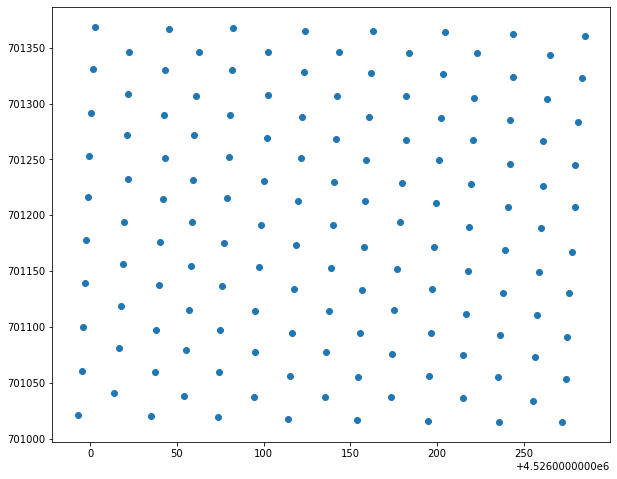

In [19]:
# This cell runs a command to see the sites from where the samples were taken in the Havelock field
plt.figure(figsize=(10,8))

# plt.scatter(df1.iloc[:,0], df1.iloc[:,1])
plt.scatter(df1['UTM_N'], df['UTM_E'])
plt.show()

In [20]:
# We perform this calculation to find approximate distance between 2 points in the field from where data is taken

from sklearn.metrics.pairwise import euclidean_distances

max_dist = 0.66 * np.max(euclidean_distances(df1))
max_dist = round(max_dist, 2)
max_dist

295.82

In [21]:
import skgstat as skg

### We will plot a variogram from the data we have
The Variogram class takes at least two arguments.<br>
`Mandatory` - The `coordinates` and the `values` observed at these locations.<br>
`Additional` - `n_lags` - the number of coords that would be used to plot the variogram. The `maxlag` set the maximum distance for the last bin.


In [22]:
# Building a variogram
Vario = skg.Variogram(coordinates = df1, values = pH, model = 'exponential', maxlag = max_dist, n_lags = 50)

In [23]:
# To reduce the number of points in the empirical semivariogram, the pairs of locations will be grouped 
# based on their distance from one another. This grouping process is known as binning
Vario.bins

array([  5.91550978,  11.83101957,  17.74652935,  23.66203913,
        29.57754892,  35.4930587 ,  41.40856849,  47.32407827,
        53.23958805,  59.15509784,  65.07060762,  70.9861174 ,
        76.90162719,  82.81713697,  88.73264675,  94.64815654,
       100.56366632, 106.4791761 , 112.39468589, 118.31019567,
       124.22570546, 130.14121524, 136.05672502, 141.97223481,
       147.88774459, 153.80325437, 159.71876416, 165.63427394,
       171.54978372, 177.46529351, 183.38080329, 189.29631308,
       195.21182286, 201.12733264, 207.04284243, 212.95835221,
       218.87386199, 224.78937178, 230.70488156, 236.62039134,
       242.53590113, 248.45141091, 254.3669207 , 260.28243048,
       266.19794026, 272.11345005, 278.02895983, 283.94446961,
       289.8599794 , 295.77548918])

In [24]:
# The experimental variogram is a discrete function calculated using a measure of variability 
# between pairs of points at various distances
Vario.experimental

array([       nan,        nan,        nan,        nan, 0.07556306,
       0.09078125, 0.05240909, 0.08      , 0.1665625 , 0.06747706,
       0.09752983, 0.06611111, 0.06027027, 0.06967347, 0.09284987,
       0.11380165, 0.09346154, 0.12354749, 0.09234463, 0.11595012,
       0.09182731, 0.12464516, 0.10215517, 0.12047959, 0.13248062,
       0.14484581, 0.10918239, 0.11299559, 0.14652616, 0.13866667,
       0.12780193, 0.14877953, 0.13628821, 0.14462821, 0.15312775,
       0.13224026, 0.13874126, 0.15210123, 0.16455102, 0.12162393,
       0.16620833, 0.16141221, 0.14993691, 0.14603261, 0.17460784,
       0.15483553, 0.13691667, 0.15561702, 0.16773585, 0.166375  ])

In [25]:
# Values used here are the pH values
Vario.values

array([5.9, 5.9, 5.8, 5.4, 5.6, 5.1, 5.2, 5.3, 5.3, 5.3, 5.3, 5.3, 5.4,
       5.1, 6. , 5.5, 5.8, 5.2, 5.7, 5.5, 5.8, 6.2, 5.9, 5.8, 5.5, 5.2,
       5.4, 5.4, 5.2, 5.6, 5.1, 5.1, 5.3, 5.1, 5.2, 5.4, 5.3, 5.3, 5.7,
       5.3, 5.4, 5.7, 5.6, 5.4, 5.6, 5.6, 5. , 5.4, 5.2, 5.1, 6. , 5.7,
       5.8, 5.3, 5.5, 6.1, 5.7, 5.9, 5.8, 5.9, 6.2, 6.2, 5.9, 6.3, 6.5,
       6.1, 6. , 6.4, 5.9, 5.8, 6.1, 5.8, 6. , 5.8, 5.9, 6.4, 5.9, 5.9,
       5.7, 6.1, 6. , 6. , 5.8, 5.9, 6.1, 5.1, 5.8, 5.5, 5.7, 5.3, 5.3,
       5.8, 5.3, 6.1, 5.9, 5.9, 6.1, 5.9, 5.9, 6. , 5.8, 6. , 5.7, 5.6,
       5.7, 5.4, 5.3, 5.7, 5.9, 5.6, 5.9, 5.7, 5.3, 5.5, 5.6, 5.3, 5.7,
       5.7, 5.9, 5.8, 6.5, 5.9, 6.3, 6.2, 6.1, 6. , 6. , 5.8, 6.2, 6.3,
       5.8, 5.7, 5.6, 5.6, 6. , 6.2, 6. , 5.6, 6.6, 5.9, 6.3, 6.2, 6.1])

In [26]:
# Code to convert nan values to zero values
x = Vario.experimental

# Use of numpy for conversion of nan to 0
x = np.nan_to_num(x)
x = np.round(x, 3)
x

array([0.   , 0.   , 0.   , 0.   , 0.076, 0.091, 0.052, 0.08 , 0.167,
       0.067, 0.098, 0.066, 0.06 , 0.07 , 0.093, 0.114, 0.093, 0.124,
       0.092, 0.116, 0.092, 0.125, 0.102, 0.12 , 0.132, 0.145, 0.109,
       0.113, 0.147, 0.139, 0.128, 0.149, 0.136, 0.145, 0.153, 0.132,
       0.139, 0.152, 0.165, 0.122, 0.166, 0.161, 0.15 , 0.146, 0.175,
       0.155, 0.137, 0.156, 0.168, 0.166])

C:\Users\psingh24\AppData\Roaming\Python\Python39\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


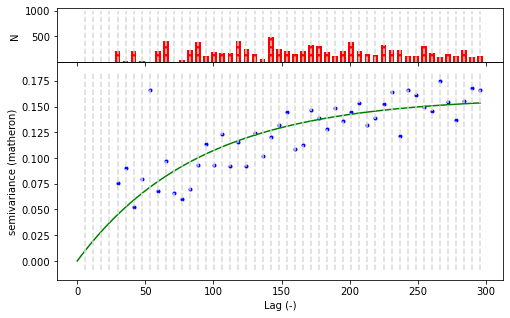

In [27]:
# Plotting the variogram
Vario.plot()
plt.show()

The upper subplot show the histogram for the count of point-pairs in each lag class<br>
Also, we can clearly see from the plot that as the distance between bins increases the semivariance also increases between those locations

In [28]:
# Description of the parameters used to plot variogram
Vario.describe()

{'model': 'exponential',
 'estimator': 'matheron',
 'dist_func': 'euclidean',
 'normalized_effective_range': 79340.37851850122,
 'normalized_sill': 0.02782682826331595,
 'normalized_nugget': 0,
 'effective_range': 268.24527866840356,
 'sill': 0.15936757343392616,
 'nugget': 0,
 'params': {'estimator': 'matheron',
  'model': 'exponential',
  'dist_func': 'euclidean',
  'bin_func': 'even',
  'normalize': False,
  'fit_method': 'trf',
  'fit_sigma': None,
  'use_nugget': False,
  'maxlag': 295.82,
  'n_lags': 50,
  'verbose': False},
 'kwargs': {}}

In [30]:
from skgstat import models
from scipy.optimize import curve_fit

p0 = [np.mean(Vario.bins), np.mean(x), 0]

cof, cov = curve_fit(models.exponential, Vario.bins, x, p0 = p0)

In [31]:
print("range: %.2f   sill: %.4f   nugget: %.4f" % (cof[0], cof[1], cof[2]))

range: 293.38   sill: 0.1634   nugget: 0.0001


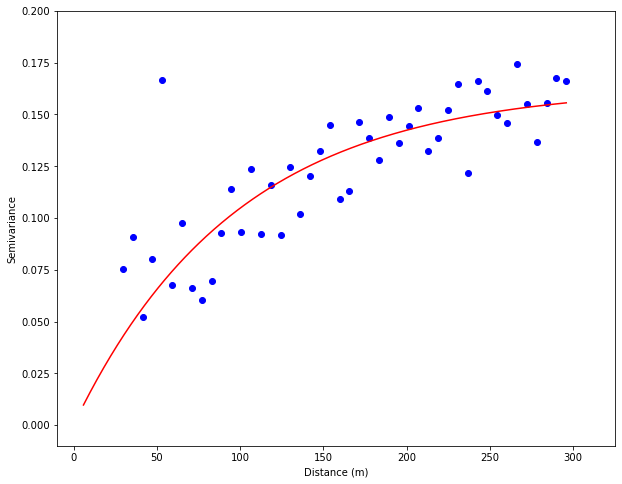

In [32]:
plt.figure(figsize=(10,8))

xi = np.linspace(Vario.bins[0], Vario.bins[-1], 500)
yi = [models.exponential(h, *cof) for h in xi]

plt.plot(Vario.bins, Vario.experimental, 'ob')
plt.plot(xi, yi, '-r')

plt.xlim([-10, 325])
plt.ylim([-0.01, 0.2])

plt.xlabel('Distance (m)')
plt.ylabel('Semivariance')

plt.show()

In [33]:
print(Vario)

exponential Variogram
---------------------
Estimator:         matheron
Effective Range:   268.25
Sill:              0.16
Nugget:            0.00
        


## Coding task for class - plot the variogram for by repeating all the above steps for column (No3) data in the field

## Kriging
<b>Kriging is a geostatistical interpolation technique that considers both the distance and the degree of variation between known data points when estimating values in unknown area<br></b>
The Kriging class will now use the Variogram from above to estimate the Kriging weights for each grid cell.

In [34]:
np.min(pH)

5.0

In [35]:
ok = skg.OrdinaryKriging(Vario, min_points=5, max_points=35, mode='exact')

In [36]:
xx, yy = np.mgrid[0:99:100j, 0:99:100j]

field = ok.transform(xx.flatten(), yy.flatten()).reshape(xx.shape)

s2 = ok.sigma.reshape(xx.shape)

In [37]:
df1

,UTM_N,UTM_E
0,4525992.9,701021.1
1,4525995.1,701060.9
2,4525996.0,701100.1
3,4525996.8,701138.9
4,4525997.6,701177.4
...,...,...
138,4526259.7,701188.8
139,4526258.5,701149.2
140,4526257.8,701111.0
141,4526256.7,701073.0


In [38]:
# build the target grid
x = df1.iloc[:, 0]
y = df1.iloc[:, 1]

xx, yy = np.mgrid[x.min():x.max():250j, y.min():y.max():250j]
field = ok.transform(xx.flatten(), yy.flatten()).reshape(xx.shape)
s2 = ok.sigma.reshape(xx.shape)

<Figure size 864x720 with 0 Axes>

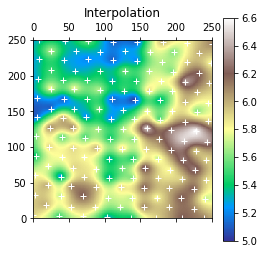

In [43]:
# fig, axes = plt.subplots(1, 2, figsize=(16, 8))
plt.figure(figsize=(12,10))

# rescale the coordinates to fit the interpolation raster
x_ = (x - x.min()) / (x.max() - x.min()) * 250
y_ = (y - y.min()) / (y.max() - y.min()) * 250

color_map = plt.cm.get_cmap('terrain_r')
rev_color_map = color_map.reversed()

plt.matshow(field.T, cmap=rev_color_map, vmin=pH.min(), vmax=pH.max())
plt.title('Interpolation')
plt.plot(x_, y_, '+w')
plt.xlim((0, 250))
plt.ylim((0, 250))
plt.colorbar()
plt.show()

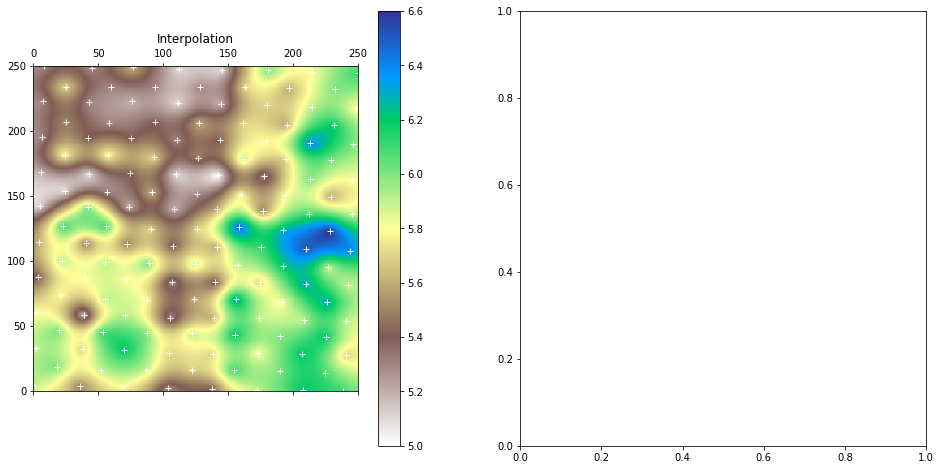

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# rescale the coordinates to fit the interpolation raster
x_ = (x - x.min()) / (x.max() - x.min()) * 250
y_ = (y - y.min()) / (y.max() - y.min()) * 250

art = axes[0].matshow(field.T, origin='lower', cmap='terrain_r', vmin=np.min(pH), vmax=np.max(pH))
axes[0].set_title('Interpolation')
axes[0].plot(x_, y_, '+w')
axes[0].set_xlim((0, 250))
axes[0].set_ylim((0, 250))
plt.colorbar(art, ax=axes[0])

# art = axes[1].matshow(s2.T, origin='lower', cmap='YlGn_r')
# axes[1].set_title('Kriging Error')
# plt.colorbar(art, ax=axes[1])
# axes[1].plot(x_, y_, '+w')
# axes[1].set_xlim((0, 500))
# axes[1].set_ylim((0, 500))
# plt.show()

In [ ]:
# Equivalent to sx code in R
sx = df.UTM_N
min1 = round(np.min(sx))
max1 = round(np.max(sx))
sx = np.round(np.linspace(min1, max1, num = 100))
sx = [int(i) for i in sx]
# sx

In [ ]:
# Equivalent to sy code in R
sy = round(df.UTM_E, 1)
min2 = np.min(sy)
max2 = np.max(sy)
sy = np.linspace(min2, max2, num = 100)
sy = [round(i, 1) for i in sy]
# sy

In [ ]:
import itertools
import pandas as pd

ab = pd.DataFrame(np.array(list(itertools.product(sy,sx))))
# abdf = pd.DataFrame(ab,columns=("sy","b"))

In [ ]:
ab = ab.rename(columns={0:'var2', 1:'var1'})
ab

sGrid = ab.reindex(columns=['var1', 'var2'])
sGrid

sGrid['var1'] = sGrid['var1'].astype(int)
sGrid